In [1]:
import sqlite3
import matplotlib.pyplot as plt
conn = sqlite3.connect("actors.sqlite3") # ბაზასთან დაკავშირება.
cursor = conn.cursor()

In [2]:
# სახელის, ფილმის სათაურისა და გამოშვების წლის მიხედვით კითხულობს და ბეჭდავს ინფორმაციას ბაზიდან.
cursor.execute("SELECT name, title, year FROM filmographies WHERE position='actor' AND year > 2010")
rows = cursor.fetchall()
for row in rows[:10]:
    print(row)

('Robert Downey Jr.', 'Sherlock Holmes: A Game of Shadows', 2011)
('Sam Shepard', 'Blackthorn', 2011)
('Thomas Haden Church', 'We Bought a Zoo', 2011)
('Thomas Haden Church', 'Killer Joe', 2011)
('Thomas Haden Church', 'Another Happy Day', 2011)
('Kevin Kline', 'No Strings Attached', 2011)
('Dustin Hoffman', 'Kung Fu Panda: Secrets of the Masters', 2011)
('Dustin Hoffman', 'Kung Fu Panda 2', 2011)
('Dustin Hoffman', 'Little Fockers: Deleted Scenes', 2011)
('John C. Reilly', 'Carnage', 2011)


In [3]:
# მომხმარებლის მიერ შემოტანილი ინფორმაციის მიხედვით ჩანაწერის ცვლილება.
name = input("მსახიობის სახელი: ")
name_id = input("მსახიობის IMDb ID: ")
title = input("ფილმის დასახელება: ")
title_id = input("ფილმის IMDb ID: ")
year = int(input("წელი: "))
kind = input("ტიპი (movie, tv): ")
position = input("როლი (actor, actress): ")
cursor.execute("INSERT INTO filmographies (name, name_id, title, title_id, year, kind, position) VALUES (?, ?, ?, ?, ?, ?, ?)",
               (name, name_id, title, title_id, year, kind, position)) #შეყვანა/დამატება
conn.commit()
print("ჩანაწერი წარმატებით დაემატა.")

მსახიობის სახელი:  Paul Winfield
მსახიობის IMDb ID:  13214131
ფილმის დასახელება:  something
ფილმის IMDb ID:  17326716
წელი:  1945
ტიპი (movie, tv):  movie
როლი (actor, actress):  actor


ჩანაწერი წარმატებით დაემატა.


In [4]:
update_name = input("ვისი მონაცემი განახლდეს? (მსახიობის სახელი): ")
new_title = input("ახალი ფილმის დასახელება: ")
cursor.execute("UPDATE filmographies SET title=? WHERE name=?", (new_title, update_name)) #განახლება.
conn.commit()
print("ჩანაწერი წარმატებით განახლდა.")

ვისი მონაცემი განახლდეს? (მსახიობის სახელი):  Paul Winfield
ახალი ფილმის დასახელება:  something


ჩანაწერი წარმატებით განახლდა.


In [5]:
delete_name = input("მსახიობის სახელი, რომლის ჩანაწერიც უნდა წაიშალოს: ")
cursor.execute("DELETE FROM filmographies WHERE name=?", (delete_name,)) #წაშლა.
conn.commit()
print("ჩანაწერი წარმატებით წაიშალა.")

მსახიობის სახელი, რომლის ჩანაწერიც უნდა წაიშალოს:  Paul Winfield


ჩანაწერი წარმატებით წაიშალა.


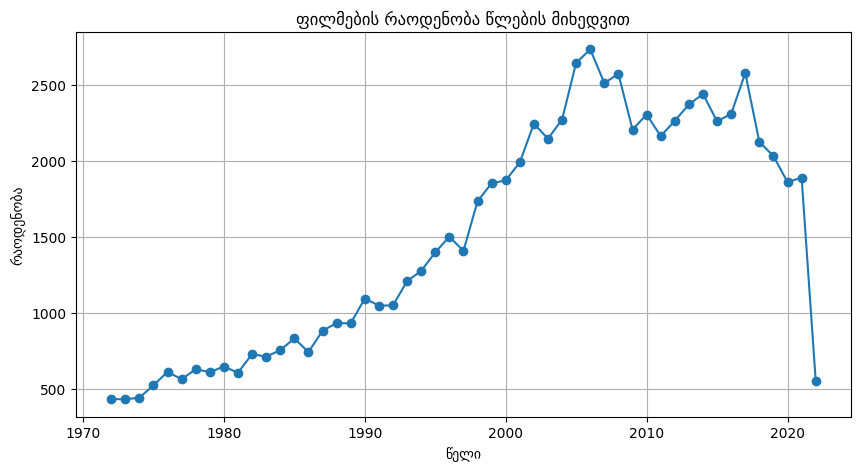

In [6]:
# დიაგრამების აგება.
# subplot დიაგრამა. აჩვენებს რომელ წელს რამდენი ფილმი გამოვიდა.
cursor.execute("SELECT year FROM filmographies")
years = [row[0] for row in cursor.fetchall() if row[0] is not None]
year_counts = {}
for year in years:
    year_counts[year] = year_counts.get(year, 0) + 1

sorted_years = sorted(year_counts.items())
x_vals = [item[0] for item in sorted_years]
y_vals = [item[1] for item in sorted_years] # დიაგრამისთვის საჭირო მონაცემები.

# დიაგრამის ვიზუალი.
plt.figure(figsize=(10,5))
plt.plot(x_vals, y_vals, marker="o")
plt.title("ფილმების რაოდენობა წლების მიხედვით")
plt.xlabel("წელი")
plt.ylabel("რაოდენობა")
plt.grid(True)
plt.show()

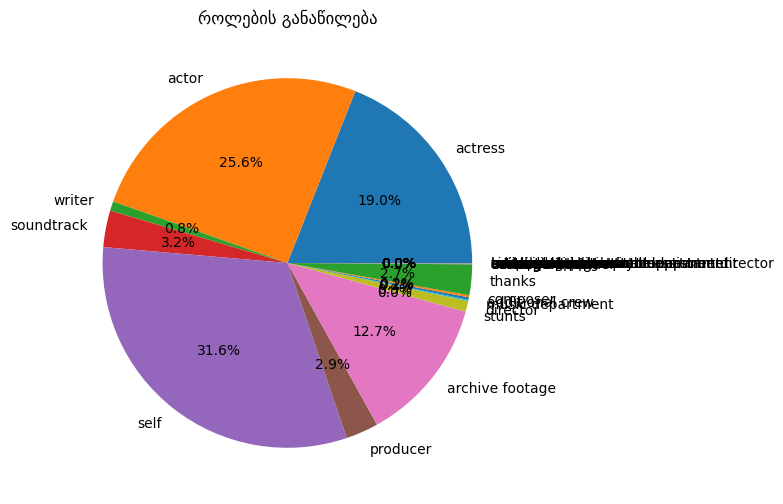

In [7]:
# წრიული დიაგრამა(piechart). აჩვენებს, როგორ ნაწილდება პოზიციები ადამიანებს შორის რაოდენობის მიხედვით.
cursor.execute("SELECT position FROM filmographies")
positions = [row[0] for row in cursor.fetchall() if row[0] is not None]
position_counts = {}
for p in positions:
    position_counts[p] = position_counts.get(p, 0) + 1 # დიაგრამისთვის საჭირო მონაცემები.

# დიაგრამის ვიზუალი.
plt.figure(figsize=(6,6))
plt.pie(position_counts.values(), labels=position_counts.keys(), autopct="%1.1f%%")
plt.title("როლების განაწილება")
plt.show()

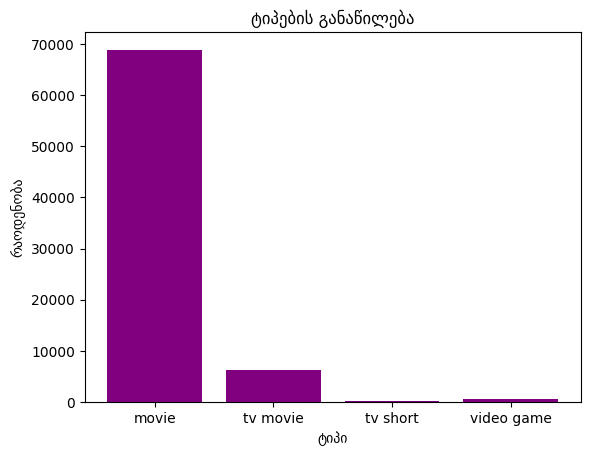

In [8]:
# სვეტოვანი დიაგრამა(barchart). აჩვენებს ფილმების რაოდენობას ტიპის მიხედვით.
cursor.execute("SELECT kind FROM filmographies")
kinds = [row[0] for row in cursor.fetchall() if row[0] is not None]
kind_counts = {}
for k in kinds:
    kind_counts[k] = kind_counts.get(k, 0) + 1 # დიაგრამისთვის საჭირო მონაცემები.

# დიაგრამის ვიზუალი.
plt.bar(kind_counts.keys(), kind_counts.values(), color='purple')
plt.title("ტიპების განაწილება")
plt.xlabel("ტიპი")
plt.ylabel("რაოდენობა")
plt.show()

In [9]:
# ბაზასთან კავშირის გაწყვეტა.
conn.close()
print("კავშირი ბაზასთან შეწყდა.")

კავშირი ბაზასთან შეწყდა.
